In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
test = pd.read_csv('../data/raw/test.csv')
train = pd.read_csv('../data/raw/train.csv')
test.shape, train.shape

((418, 11), (891, 12))

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
all_df=pd.concat([train, test])

In [5]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
all_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [8]:
all_df.drop('Cabin', inplace=True, axis=1)

In [9]:
all_df['Age'].fillna(all_df['Age'].mean(), inplace=True)
all_df['Fare'].fillna(all_df['Fare'].mean(), inplace=True)
all_df['Embarked'].fillna(all_df['Embarked'].value_counts().index[0], inplace=True)

In [10]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


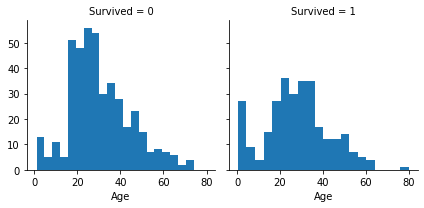

In [14]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/Users/gkesler/Documents/GitHub/kaggle-competitions/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


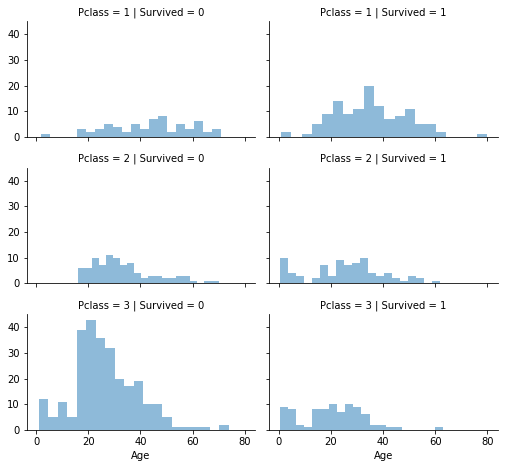

In [15]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/Users/gkesler/Documents/GitHub/kaggle-competitions/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/gkesler/Documents/GitHub/kaggle-competitions/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/gkesler/Documents/GitHub/kaggle-competitions/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


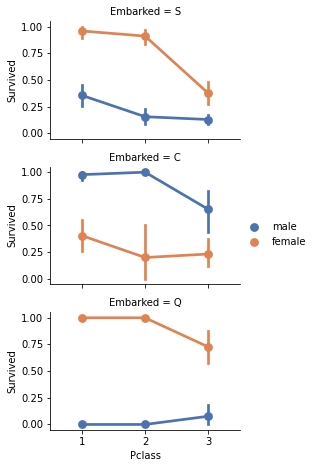

In [16]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/Users/gkesler/Documents/GitHub/kaggle-competitions/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/gkesler/Documents/GitHub/kaggle-competitions/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


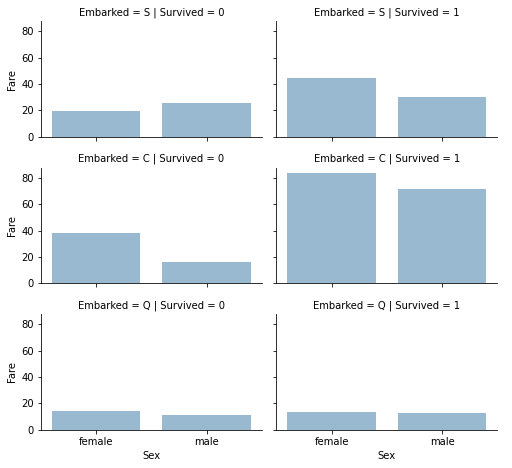

In [17]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [18]:
all_df['Title'] = all_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(all_df['Title'], all_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [19]:

all_df['Title'] = all_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

all_df['Title'] = all_df['Title'].replace('Mlle', 'Miss')
all_df['Title'] = all_df['Title'].replace('Ms', 'Miss')
all_df['Title'] = all_df['Title'].replace('Mme', 'Mrs')
    
all_df[~all_df['Survived'].isna()][['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
all_df = pd.concat([all_df, pd.get_dummies(all_df['Title'], drop_first=True)], axis=1)
all_df = all_df.drop('Title', axis=1)

In [21]:
all_df = pd.concat([all_df, pd.get_dummies(all_df['Sex'], drop_first=True)], axis=1)
all_df = all_df.drop('Sex', axis=1)

In [22]:
all_df = pd.concat([all_df, pd.get_dummies(all_df['Embarked'], drop_first=True)], axis=1)
all_df = all_df.drop('Embarked', axis=1)

In [23]:
all_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [24]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Miss         1309 non-null   uint8  
 8   Mr           1309 non-null   uint8  
 9   Mrs          1309 non-null   uint8  
 10  Rare         1309 non-null   uint8  
 11  male         1309 non-null   uint8  
 12  Q            1309 non-null   uint8  
 13  S            1309 non-null   uint8  
dtypes: float64(3), int64(4), uint8(7)
memory usage: 90.8 KB


In [25]:
all_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Miss,Mr,Mrs,Rare,male,Q,S
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.201681,0.578304,0.151261,0.022154,0.644003,0.093965,0.699771
std,378.020061,0.486592,0.837836,12.883193,1.041658,0.865560,51.738879,0.401408,0.494019,0.358440,0.147242,0.478997,0.291891,0.458533
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,29.881138,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
all_df['Age'] = MinMaxScaler().fit_transform(all_df[['Age']])
all_df['Pclass'] = MinMaxScaler().fit_transform(all_df[['Pclass']])
all_df['SibSp'] = MinMaxScaler().fit_transform(all_df[['SibSp']])
all_df['Fare'] = MinMaxScaler().fit_transform(all_df[['Fare']])

In [27]:
test_clean = all_df[all_df['Survived'].isna()].drop('Survived', axis=1)
train_clean =all_df[~all_df['Survived'].isna()]

In [28]:
test_clean.to_csv('../data/clean/test.csv', index=False)
train_clean.to_csv('../data/clean/train.csv', index=False)